In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [2]:
df = pd.read_csv('C:/torch/chap11/data/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
data = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [2]:
from sklearn.model_selection import train_test_split

In [5]:
x, y = train_test_split(data, test_size=0.2, random_state=1)

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [3]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [9]:
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [10]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device)

running k-means on cpu..


[running kmeans]: 4it [00:00, 792.09it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [11]:
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device)

predicting on cpu..


In [4]:
import matplotlib.pyplot as plt

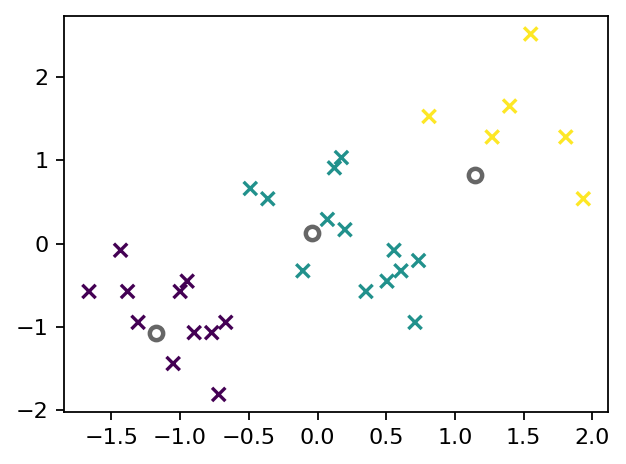

In [16]:
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='viridis', marker='x')

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [24]:
X_train = np.load('C:/torch/chap11/data/data.npy')

[[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]


[[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


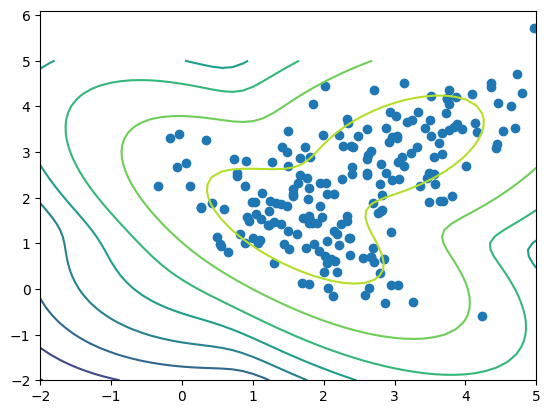

In [26]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-2, 5), np.linspace(-2, 5))
XX = np.array([X.ravel(), Y.ravel()]).T

Z = gmm.score_samples(XX)
Z = Z.reshape((50, 50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [6]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

In [8]:
digits = load_digits()
data = digits.data
labels = digits.target

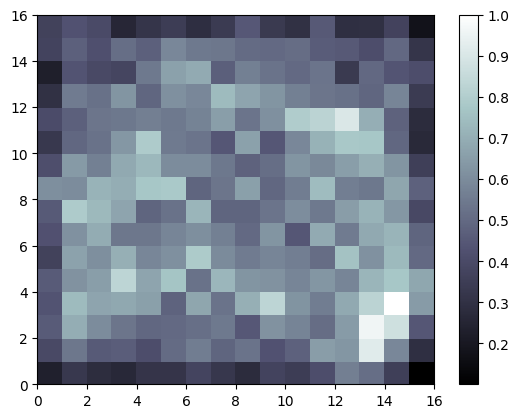

In [11]:
som = MiniSom(16, 16, 64, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 500)

bone()
pcolor(som.distance_map().T)
colorbar()

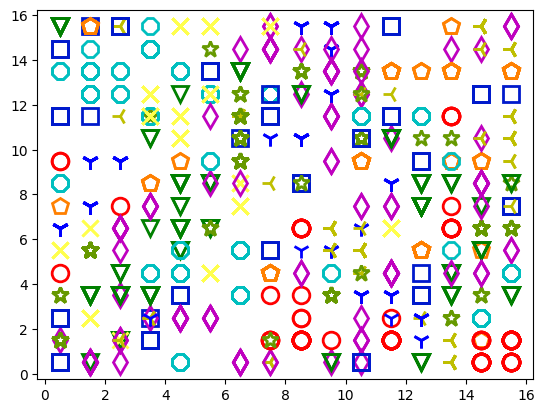

In [12]:
labels[labels=='0'] = 0
labels[labels=='1'] = 1
labels[labels=='2'] = 2
labels[labels=='3'] = 3
labels[labels=='4'] = 4
labels[labels=='5'] = 5
labels[labels=='6'] = 6
labels[labels=='7'] = 7
labels[labels=='8'] = 8
labels[labels=='9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'd', '*']
colors = ['r', 'g', 'b', 'y', 'c', (0,0.1,0.8), (1,0.5,0), (1,1,0.3), 'm', (0.4,0.6,0)]
for cnt, xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5, w[1]+.5, markers[labels[cnt]],
        markerfacecolor='None', markeredgecolor=colors[labels[cnt]],
        markersize=12, markeredgewidth=2)
show()